# Docker and AWS

## What is Docker? 
- Docker is a container management service 
- The keywords of Docker are `develop`, `ship`, and `run`. 
- It provides tools for simplifying DevOps 
    - images are templates for lightweight virtual machines
    - containers are instances of an image or images
        - applications and it's dependencies run here 

## How can we deploy a ML or DL model on the cloud (AWS)? 
1. Train, evaluate, and save the model (pickle for ML, h5 (Hadoop) for DL)
2. Build a Flask API for the model 
3. Create a `Dockerfile` and dockerize and test the Flask API on our machine 
4. Build container and deploy to AWS

## Exercise: Build a NN for MNIST 
1. Train a DL model for MNIST dataset (MLP or CNN)
2. Save model as h5
3. Test model by passing in an image from the MNIST dataset

In [27]:
import keras
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten # MLP
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [2]:
# hyperparameters
batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
print("input shape\t", input_shape)

input shape	 (28, 28, 1)


In [9]:
# normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

In [20]:
# measure accuracy of model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.058524837224162185
Test accuracy: 0.9803


In [37]:
print(y_test[0])
x = X_test[0].reshape(1, 28, 28, 1)
out = model.predict(x)
print(out[0])
print(np.argmax(out[0]))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[3.1880464e-08 5.4522009e-09 2.9700420e-06 1.8667237e-07 6.3274358e-10
 2.8115728e-09 5.1061278e-12 9.9999619e-01 8.0669537e-08 4.9990240e-07]
7


In [38]:
# Save the model
model.save('model.h5')

# Save the weights
model.save_weights('model_weights.h5')

# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

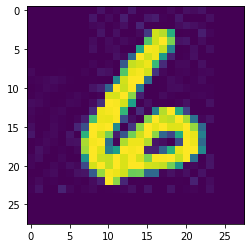

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("test_mnist_6.jpg")
img_arr = np.array(img)
plt.imshow(img_arr)

In [31]:
x = img_arr.reshape(1, 28, 28, 1)
output = model.predict(x)
print(output[0])
print(np.argmax(output[0]))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6
